In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import data_reader

#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format

#set figure dpi to 100 to get reasonably sized figures displayed in the notebook
plt.rc('figure', dpi=100)

#set savefig dpi to 300 to get high-quality images to insert in the paper
plt.rc('savefig', dpi=300)

#set to 'pdf' or 'eps' for vector figures or to 'png'
plt.rc('savefig', format='png')

#set font sizes for figures throughout
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)

index = ['subj_id', 'session_no', 'block_no', 'trial_no']

In [2]:
dr = data_reader.DataReader()

# if Exp1 and Exp2 data need to be plotted alongside each other, read those data into separate dataframes
exp_1, exp_2 = 'HEM_exp_1', 'HEM_exp_2'
choices_1, dynamics_1, stim_viewing_1 = dr.get_data(path='../../data/%s/processed/' % (exp_1), stim_viewing=True)
choices_2, dynamics_2, stim_viewing_2 = dr.get_data(path='../../data/%s/processed/' % (exp_2), stim_viewing=True)

In [3]:
choices, dynamics, stim_viewing = choices_1, dynamics_1, stim_viewing_1
# choices, dynamics, stim_viewing = choices_2, dynamics_2, stim_viewing_2

In [4]:
choices['early_it'] = stim_viewing.groupby(level=index).apply(
        lambda traj: traj.timestamp.max()-traj.timestamp[traj.mouse_dx==0].iloc[-1])

choices['stim_response'] = choices['early_it'] != 0
choices['early_response'] = choices['initiation_time'] == 0

In [5]:
choices.groupby(['stim_response', 'early_response']).size().unstack()/len(choices)

early_response,False,True
stim_response,,
False,0.853,0.054
True,0.006,0.087


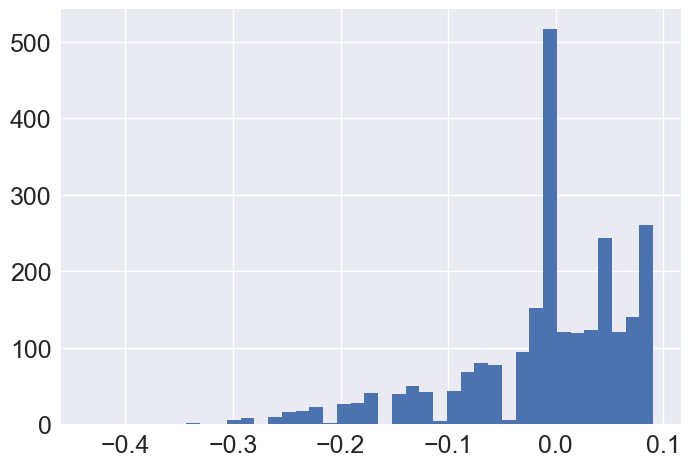

In [6]:
choices.loc[choices.initiation_time==0, 'initiation_time'] = -choices.loc[choices.initiation_time==0, 'early_it']
choices.initiation_time[choices.initiation_time<0.1].hist(bins=41)

In [7]:
dynamics['mouse_v'] = np.sqrt(dynamics.mouse_vx**2 + dynamics.mouse_vy**2 )

0.8526041666666667
[ 198.58075562]
[ 196.33192962]
[ 606.90510765]
[ 1061.76638971]


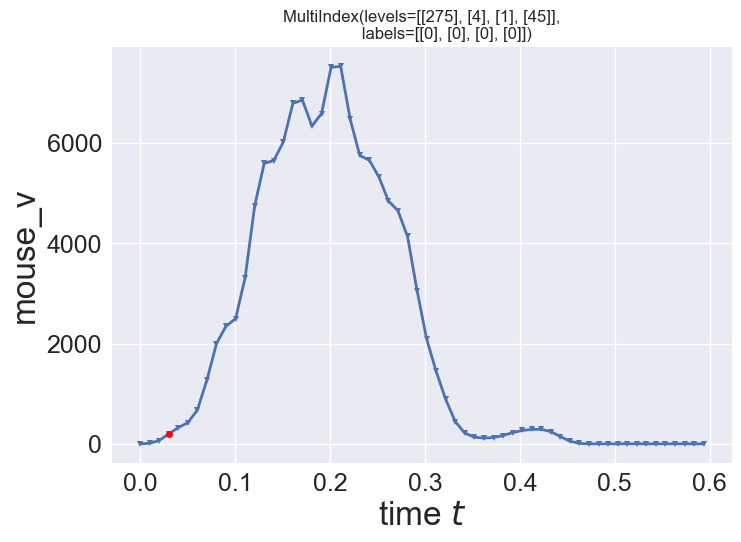

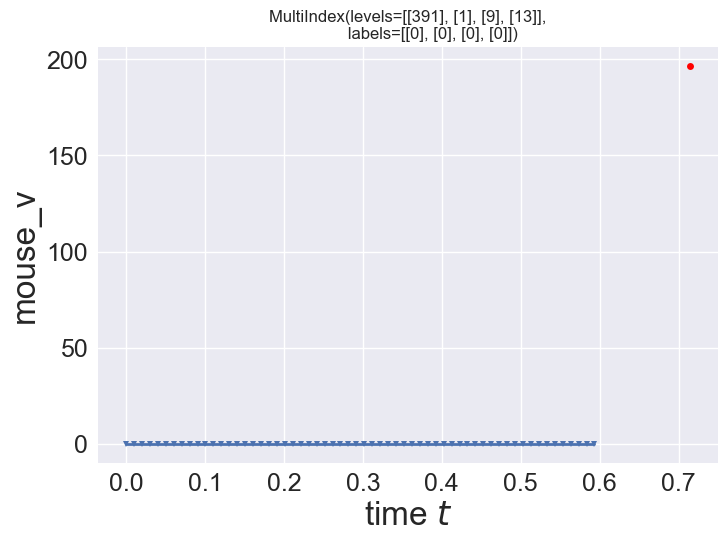

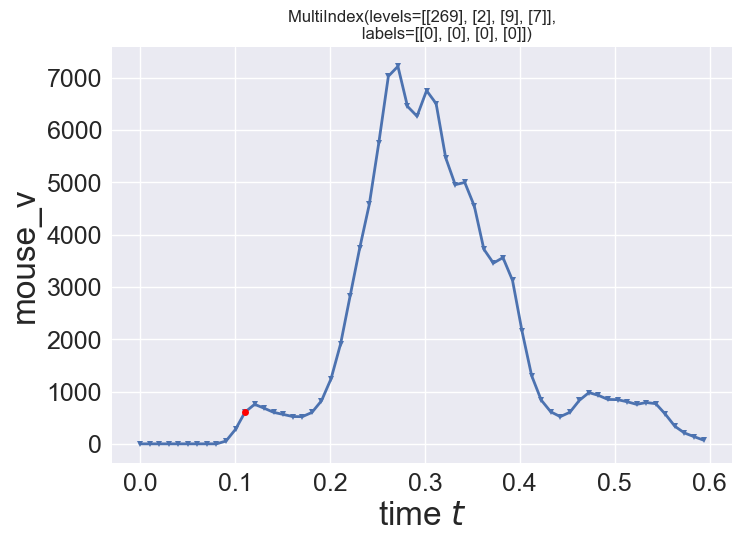

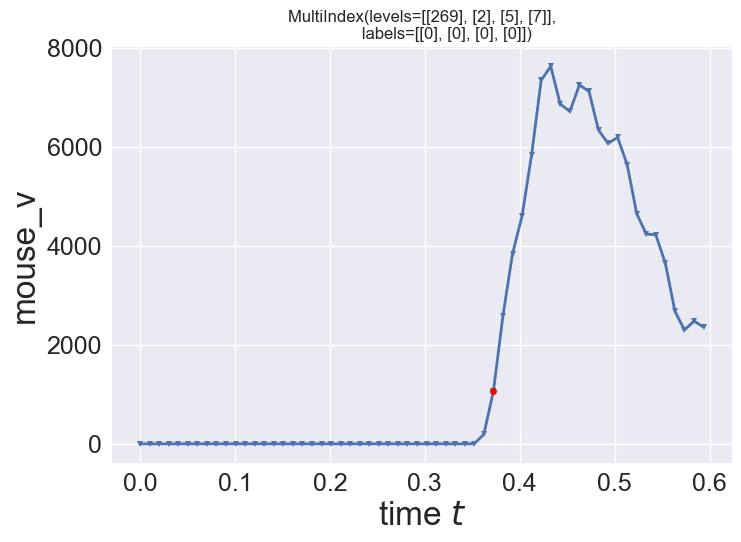

In [15]:
import random
import trajectory_plotter

tp = trajectory_plotter.TrajectoryPlotter()

choices_tmp = choices[~(choices.early_response) & ~(choices.stim_response)]

print(len(choices_tmp)/len(choices))

for i in range(1,5):
    trial = random.sample(list(choices_tmp.index), 1)
    choice = choices.loc[trial]
    stim = stim_viewing.loc[trial]
    traj = dynamics.loc[trial]

    it = choice['initiation_time']
    ap = traj[traj.timestamp==it.values[0]].mouse_v
    print(ap.values)

#     ax = tp.plot_trajectory_x(traj[:20], v=True, eye=False)
    ax = tp.plot_trajectory_var(traj[:60], var='mouse_v')
    ax.plot(it, ap, marker='o', ms=5, color='red')
#     tp.plot_trajectory_x(traj[:20], v=True, eye=False)